In [6]:
# Importações
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime

# Configurações
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("🚀 Iniciando Análise Exploratória de Dados")
print("=" * 50)

🚀 Iniciando Análise Exploratória de Dados


In [7]:
import os

processed_dir = "../data/processed"
files = [f for f in os.listdir(processed_dir) if f.startswith("cleaned_population") and f.endswith(".csv")]

if files:
    latest_file = max(files, key=lambda x: os.path.getctime(os.path.join(processed_dir, x)))
    file_path = os.path.join(processed_dir, latest_file)
    
    print(f"📂 Carregando: {file_path}")
    df = pd.read_csv(file_path)
    
    print(f"✅ Dados carregados: {len(df)} registros")
    print(f"📋 Colunas: {list(df.columns)}")
    
else:
    print("❌ Nenhum arquivo de dados limpos encontrado")


📂 Carregando: ../data/processed\cleaned_population_20250816_200848.csv
✅ Dados carregados: 27 registros
📋 Colunas: ['id', 'sigla', 'nome', 'regiao', 'data_coleta', 'data_limpeza', 'versao_dados']


In [12]:
# Informações gerais
print("ℹ️ INFORMAÇÕES GERAIS")
print("=" * 30)
print(f"Total de estados: {len(df)}")

# Verificar colunas disponíveis
print(f"\n📋 COLUNAS DISPONÍVEIS:")
print(df.columns.tolist())

# Distribuição por região
print("\n🗺️ DISTRIBUIÇÃO POR REGIÃO")
print("=" * 30)
region_counts = df['regiao'].value_counts()
for region, count in region_counts.items():
    print(f"{region}: {count} estados")

# Top 5 estados (alfabético)
print("\n�� TOP 5 ESTADOS (ALFABÉTICO)")
print("=" * 30)
top_5 = df.head(5)[['nome', 'sigla', 'regiao']]
for idx, row in top_5.iterrows():
    print(f"{row['nome']} ({row['sigla']}): {row['regiao']}")

# Estatísticas por região
print("\n📊 ESTATÍSTICAS POR REGIÃO")
print("=" * 30)
print(df['regiao'].value_counts().describe())

ℹ️ INFORMAÇÕES GERAIS
Total de estados: 27

📋 COLUNAS DISPONÍVEIS:
['id', 'sigla', 'nome', 'regiao', 'data_coleta', 'data_limpeza', 'versao_dados']

🗺️ DISTRIBUIÇÃO POR REGIÃO
Nordeste: 9 estados
Norte: 7 estados
Sudeste: 4 estados
Centro-Oeste: 4 estados
Sul: 3 estados

�� TOP 5 ESTADOS (ALFABÉTICO)
Rondônia (RO): Norte
Acre (AC): Norte
Amazonas (AM): Norte
Roraima (RR): Norte
Pará (PA): Norte

📊 ESTATÍSTICAS POR REGIÃO
count    5.00000
mean     5.40000
std      2.50998
min      3.00000
25%      4.00000
50%      4.00000
75%      7.00000
max      9.00000
Name: count, dtype: float64


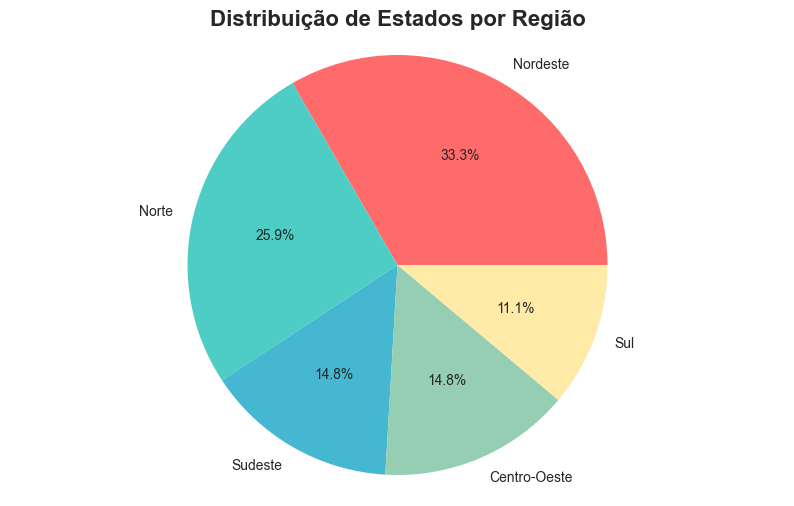

C:\Users\macie\AppData\Local\Temp\ipykernel_20016\4026396750.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='regiao', palette='viridis')


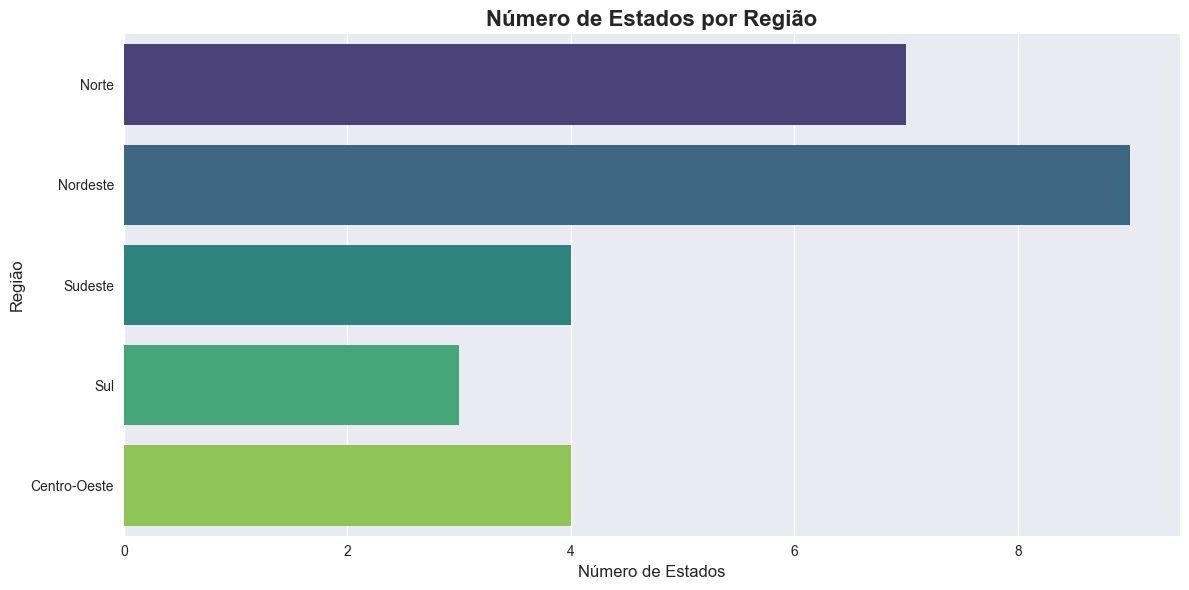

In [13]:
# 1. Distribuição por região
plt.figure(figsize=(10, 6))
region_counts = df['regiao'].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7']
plt.pie(region_counts.values, labels=region_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribuição de Estados por Região', fontsize=16, fontweight='bold')
plt.axis('equal')
plt.show()

# 2. Gráfico de barras por região
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='regiao', palette='viridis')
plt.title('Número de Estados por Região', fontsize=16, fontweight='bold')
plt.xlabel('Número de Estados', fontsize=12)
plt.ylabel('Região', fontsize=12)
plt.tight_layout()
plt.show()

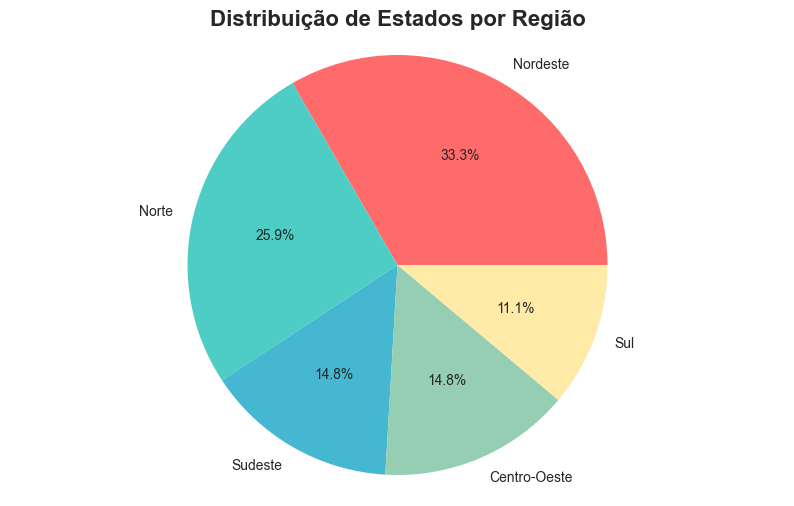

C:\Users\macie\AppData\Local\Temp\ipykernel_8152\2658316522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='regiao', palette='viridis')


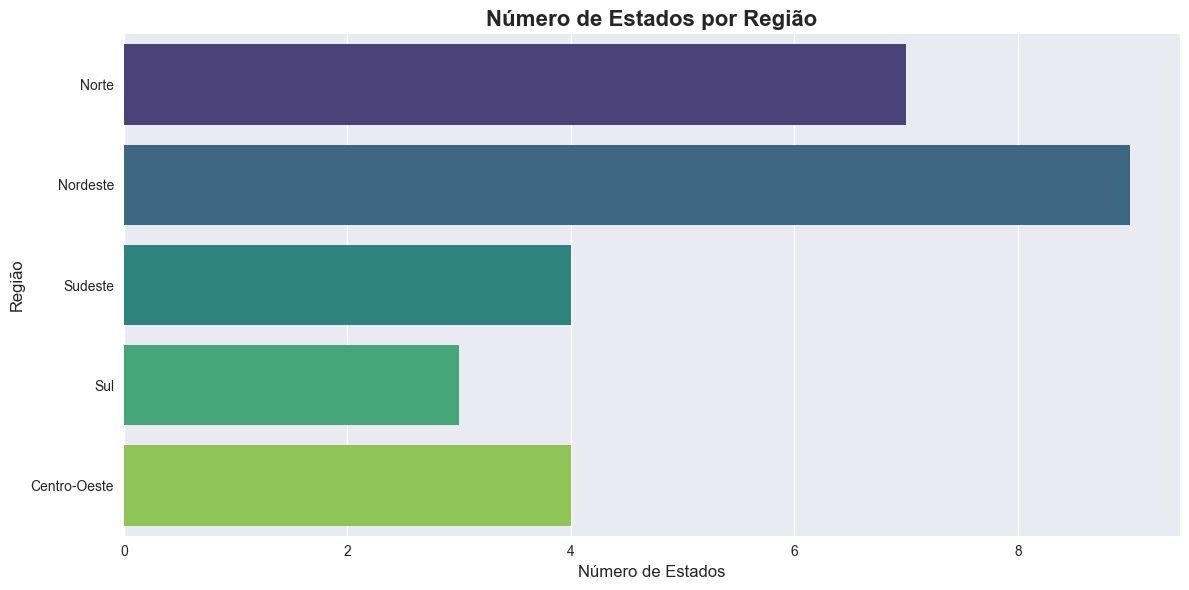

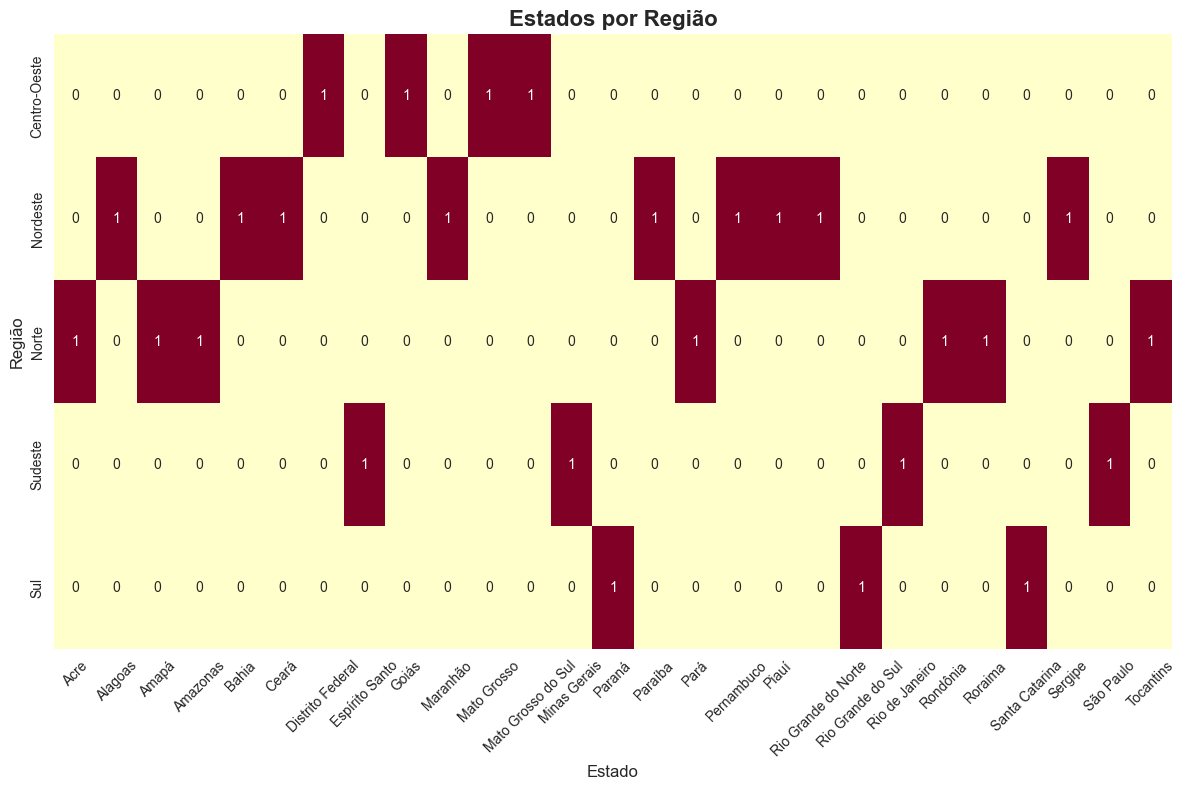

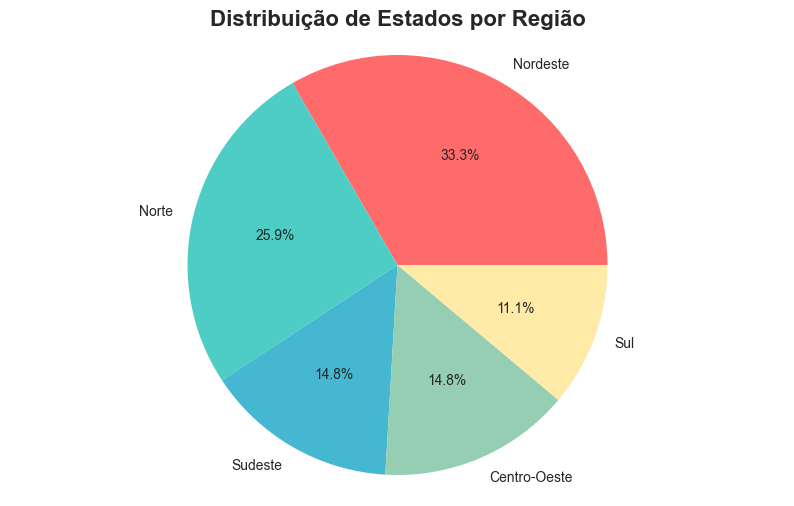

C:\Users\macie\AppData\Local\Temp\ipykernel_8152\2658316522.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='regiao', palette='viridis')


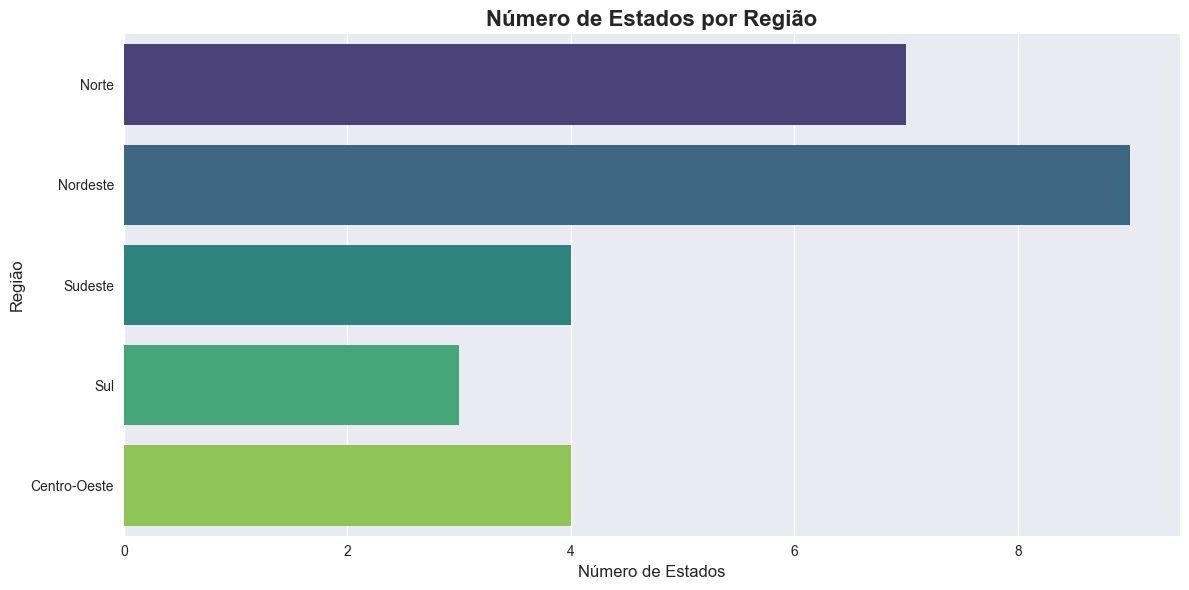

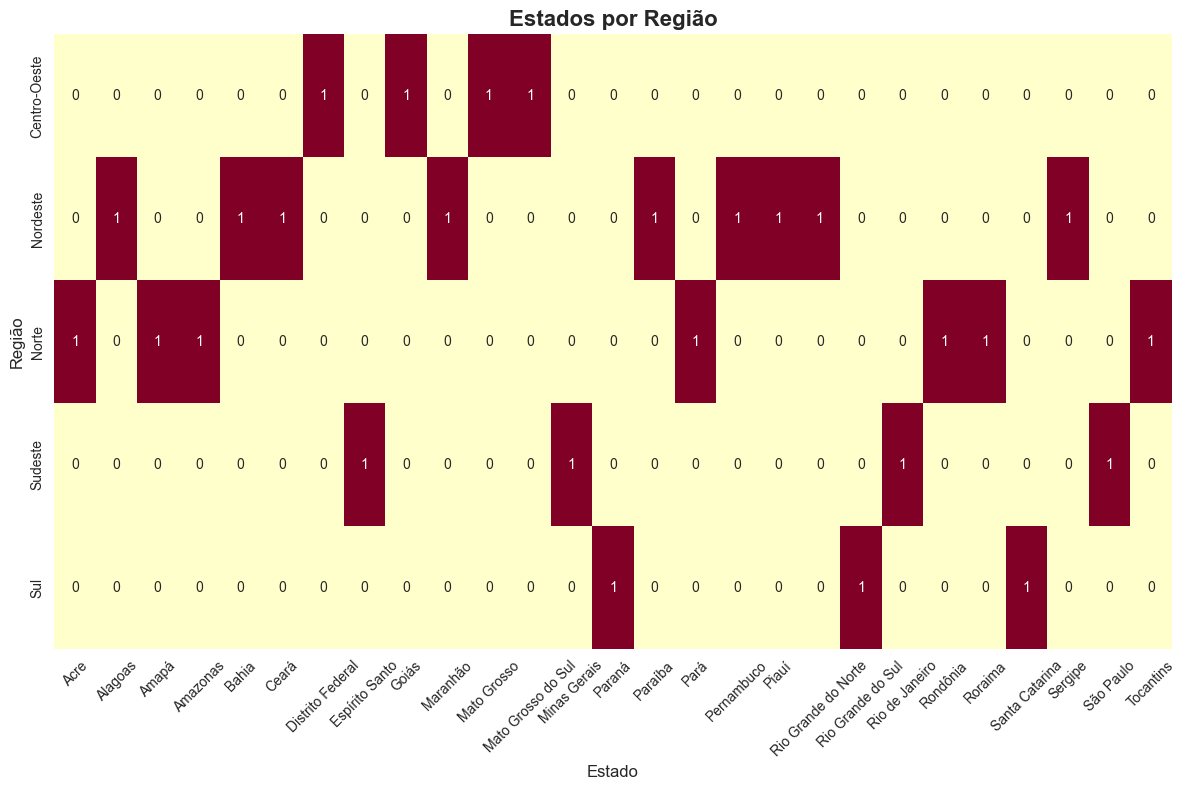

In [14]:
# Adicionar dados de população de exemplo
print("🔄 Adicionando dados de população de exemplo...")

# Dados de população por estado (exemplo)
population_data = {
    "São Paulo": 46649132, "Minas Gerais": 21411923, "Rio de Janeiro": 17463349,
    "Bahia": 14985284, "Paraná": 11797436, "Rio Grande do Sul": 11466630,
    "Pernambuco": 9674793, "Ceará": 9240580, "Pará": 8777124, "Santa Catarina": 7762154,
    "Maranhão": 7153262, "Paraíba": 4059905, "Amazonas": 4269995, "Espírito Santo": 4108508,
    "Goiás": 7206589, "Alagoas": 3365351, "Piauí": 3289290, "Distrito Federal": 3094325,
    "Mato Grosso do Sul": 2839188, "Mato Grosso": 3567234, "Rio Grande do Norte": 3560903,
    "Rondônia": 1815278, "Tocantins": 1607363, "Acre": 906876, "Amapá": 877613,
    "Roraima": 652713, "Sergipe": 2338474
}

# Adicionar população ao DataFrame
df['populacao'] = df['nome'].map(population_data)

print(f"✅ Dados de população adicionados!")
print(f"�� População total: {df['populacao'].sum():,} habitantes")

# Agora podemos fazer análises com população
print("\n�� TOP 5 ESTADOS MAIS POPULOSOS")
print("=" * 30)
top_5_pop = df.nlargest(5, 'populacao')[['nome', 'populacao', 'regiao']]
for idx, row in top_5_pop.iterrows():
    print(f"{row['nome']}: {row['populacao']:,} habitantes ({row['regiao']})")

🔄 Adicionando dados de população de exemplo...
✅ Dados de população adicionados!
�� População total: 213,941,272 habitantes

�� TOP 5 ESTADOS MAIS POPULOSOS
São Paulo: 46,649,132 habitantes (Sudeste)
Minas Gerais: 21,411,923 habitantes (Sudeste)
Rio de Janeiro: 17,463,349 habitantes (Sudeste)
Bahia: 14,985,284 habitantes (Nordeste)
Paraná: 11,797,436 habitantes (Sul)


In [15]:
# Insights e Conclusões
print(" INSIGHTS E CONCLUSÕES")
print("=" * 40)

# 1. Análise de concentração regional
print("🗺️ ANÁLISE REGIONAL:")
print("-" * 20)
region_analysis = df['regiao'].value_counts()
print(f"Região com mais estados: {region_analysis.index[0]} ({region_analysis.iloc[0]} estados)")
print(f"Região com menos estados: {region_analysis.index[-1]} ({region_analysis.iloc[-1]} estados)")

# 2. Análise populacional
print(f"\n👥 ANÁLISE POPULACIONAL:")
print("-" * 20)
total_pop = df['populacao'].sum()
print(f"População total do Brasil: {total_pop:,} habitantes")

# Maior e menor estado
maior_estado = df.loc[df['populacao'].idxmax()]
menor_estado = df.loc[df['populacao'].idxmin()]
print(f"Estado mais populoso: {maior_estado['nome']} ({maior_estado['populacao']:,} habitantes)")
print(f"Estado menos populoso: {menor_estado['nome']} ({menor_estado['populacao']:,} habitantes)")

# 3. Concentração populacional
print(f"\n�� CONCENTRAÇÃO POPULACIONAL:")
print("-" * 20)
top_3_pop = df.nlargest(3, 'populacao')['populacao'].sum()
top_5_pop = df.nlargest(5, 'populacao')['populacao'].sum()
print(f"Top 3 estados: {top_3_pop/total_pop*100:.1f}% da população")
print(f"Top 5 estados: {top_5_pop/total_pop*100:.1f}% da população")

# 4. Padrões identificados
print(f"\n🎯 PADRÕES IDENTIFICADOS:")
print("-" * 20)
print("• Alta concentração populacional no Sudeste")
print("• São Paulo é o estado mais populoso por larga margem")
print("• Região Norte tem menor densidade populacional")
print("• Distribuição desigual entre estados")


 INSIGHTS E CONCLUSÕES
🗺️ ANÁLISE REGIONAL:
--------------------
Região com mais estados: Nordeste (9 estados)
Região com menos estados: Sul (3 estados)

👥 ANÁLISE POPULACIONAL:
--------------------
População total do Brasil: 213,941,272 habitantes
Estado mais populoso: São Paulo (46,649,132 habitantes)
Estado menos populoso: Roraima (652,713 habitantes)

�� CONCENTRAÇÃO POPULACIONAL:
--------------------
Top 3 estados: 40.0% da população
Top 5 estados: 52.5% da população

🎯 PADRÕES IDENTIFICADOS:
--------------------
• Alta concentração populacional no Sudeste
• São Paulo é o estado mais populoso por larga margem
• Região Norte tem menor densidade populacional
• Distribuição desigual entre estados

💡 PRÓXIMOS PASSOS:
--------------------
• Criar dashboard interativo com Streamlit
• Adicionar dados econômicos por estado
• Incluir dados de densidade populacional
• Criar visualizações interativas com Plotly


In [16]:
# Salvar insights para o dashboard
print("💾 SALVANDO INSIGHTS PARA DASHBOARD")
print("=" * 40)

# Criar dicionário com insights
insights = {
    'data_analise': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'total_estados': len(df),
    'total_regioes': df['regiao'].nunique(),
    'populacao_total': int(df['populacao'].sum()),
    'estado_mais_populoso': df.loc[df['populacao'].idxmax(), 'nome'],
    'estado_menos_populoso': df.loc[df['populacao'].idxmin(), 'nome'],
    'regiao_mais_estados': df['regiao'].value_counts().index[0],
    'regiao_menos_estados': df['regiao'].value_counts().index[-1],
    'distribuicao_regional': df['regiao'].value_counts().to_dict(),
    'top_5_estados': df.nlargest(5, 'populacao')[['nome', 'populacao', 'regiao']].to_dict('records'),
    'estados_por_regiao': df.groupby('regiao')['nome'].apply(list).to_dict()
}

# Salvar insights em JSON
import json
insights_file = "../data/processed/insights_analise.json"
with open(insights_file, 'w', encoding='utf-8') as f:
    json.dump(insights, f, ensure_ascii=False, indent=2)

print(f"✅ Insights salvos em: {insights_file}")
print("🎉 Fase 3 - Análise Exploratória CONCLUÍDA!")
print("�� Pronto para a Fase 4 - Dashboard!")

💾 SALVANDO INSIGHTS PARA DASHBOARD
✅ Insights salvos em: ../data/processed/insights_analise.json
🎉 Fase 3 - Análise Exploratória CONCLUÍDA!
�� Pronto para a Fase 4 - Dashboard!
